## This notebook computes all feasible combinations of Dummy Cable B (DCB) bundles, providing helpful statistics so to choose the best combination

### Imports

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 

In [4]:
from itertools import combinations

In [5]:
from pfs.drp.stella import DetectorMap

### Definitions

In [6]:
NUMBER_COLLIMATORS = 5

In [ ]:
DETECTORMAP_NAME = '/tigress/hassans/subaru-runs/repo-01/CALIB/DETECTORMAP/pfsDetectorMap-000000-r1.fits'

### FiberIds for each bundle

#### Seven-fiber bundles

In [7]:
blue_fibers = [32, 111, 223, 289, 418, 518, 620]

green_fibers = [63, 192, 255, 401, 464, 525, 587]
    
orange_fibers = [12, 60, 110, 161, 210, 259, 341]
    
yellow_fibers = [347, 400, 449, 466, 545, 593, 641]

#### Single-fiber bundles (red1-8)

In [8]:
red_fibers = [2, 3, 308, 339, 340, 342, 649, 650]

### Compute median x-position for each fiber in bundle

In [9]:
def xpositions( dMap, bundle ):
    xpos = []
    for fiberId in bundle:
        xpos.append(np.median(dMap.getXCenter(fiberId)))
    return [int(x) for x in xpos]

### Import representative detectorMap

In [10]:
detMap = DetectorMap.readFits(DETECTORMAP_NAME)

### Create lists of mean x-positions for each bundle

In [11]:
blue_xpos = xpositions(detMap, blue_fibers)

In [12]:
green_xpos = xpositions(detMap, green_fibers)

In [13]:
orange_xpos = xpositions(detMap, orange_fibers)

In [14]:
yellow_xpos = xpositions(detMap, yellow_fibers)

### Note: red bundles grouped together

In [15]:
red_xpos = xpositions(detMap, red_fibers)

In [16]:
bundles = { 'red1': [red_xpos[0]], 'red2': [red_xpos[1]], 'red3': [red_xpos[2]], 'red4': [red_xpos[3]], 
           'red5': [red_xpos[4]], 'red6': [red_xpos[5]], 'red7': [red_xpos[6]], 'red8': [red_xpos[7]],
           'orange': orange_xpos, 'yellow': yellow_xpos, 'blue': blue_xpos, 'green': green_xpos }

### Compute statistics for each combination of bundles to be used 

In [17]:
def checkCombo(sequence):
    c = np.concatenate(sequence)
    d = np.sort(c)
    diff = np.diff(d)
    nFibers = len(c)
    sepMin = np.min(diff)
    sepMax = np.max(diff)
    nOverlaps = np.count_nonzero(diff < 60)
    overlapIndices = np.nonzero(diff < 60)
    overlapPosns = [(d[x], d[x+1]) for x in overlapIndices]
    return [nFibers, nOverlaps, overlapPosns, sepMin, sepMax, ]

### Now compute combination of bundles and stats

In [18]:
def computeCombos(bundles):
    data=[]
    for combination in list(combinations(bundles.keys(), NUMBER_COLLIMATORS)):
        sequence = []
        for element in combination:
            sequence.append(np.array(bundles[element]))
        result = checkCombo(sequence)
        row = [combination] + result
        data.append(row)
    return data

### Define plot routines

In [19]:
def plot_bundle(bundle_xpos, col, text_y):
    for xpos in bundle_xpos:
        plt.plot([xpos, xpos], [0, 4000], color=col, lw='3')
        plt.text(x=xpos-100, y=text_y, s=xpos, color=col)   

#### Define plot characteristics for each bundle (plot colour, label position)

In [20]:
bundle_plot_info = { 'red1': ['red', -370], 'red2': ['red', -170], 'red3': ['red', -170], 'red4': ['red',  -70], 
           'red5': ['red', -470], 'red6': ['red', -170], 'red7': ['red', -270], 'red8': ['red', -170],
           'orange': ['orange', -270], 'yellow': ['gold', -370], 'blue': ['blue', -470], 'green': ['green', -570] }

#### Plot each fiber of a bundle as a vertical line, centred on the median x-position of that fibre. Mark overlapping fibers.

In [51]:
def plot_bundles(bundle_names, overlapPosns):
    plt.figure(figsize=(20,20))
    for key in bundle_names:
        plot_bundle(bundles[key], bundle_plot_info[key][0], bundle_plot_info[key][1])
    # Annotate plot with overlap positions
    # FIXME: rather messy indexing
    plt.plot(overlapPosns[0][0], [2000]*len(overlapPosns[0][0]), '>', color='black', markersize=12)
    plt.plot(overlapPosns[0][1], [2000]*len(overlapPosns[0][1]), '<', color='black', markersize=12)
    plt.ylim(-600)
    plt.title(f'Dummy cable fibers {bundle_names}')

#### Plot a specific bundle combination, with the comboNumber simply being the row of the input dataframe

In [53]:
def plot_combo(df, comboNumber):
    plot_bundles(df['Bundle'][comboNumber], df['overlapPosns'][comboNumber])

### Show results

In [54]:
data = computeCombos(bundles)

In [55]:
df = pd.DataFrame(data, columns = ['Bundle', 'nFibers', 'nOverlaps', 'overlapPosns', 'minSepPix', 'maxSepPix'])

In [56]:
df_sorted = df.sort_values(by=['nFibers', 'nOverlaps'], ascending=False).reset_index(drop=True)

In [58]:
df_sorted

,Bundle,nFibers,nOverlaps,overlapPosns,minSepPix,maxSepPix
0,"(red2, orange, yellow, blue, green)",29,9,"[([425, 846, 1210, 1610, 1943, 2415, 3328, 362...",6,327
1,"(red4, orange, yellow, blue, green)",29,9,"[([425, 846, 1210, 1610, 1943, 1980, 2415, 332...",6,327
2,"(red5, orange, yellow, blue, green)",29,9,"[([425, 846, 1210, 1610, 1943, 1980, 2415, 332...",6,327
3,"(red6, orange, yellow, blue, green)",29,9,"[([425, 846, 1210, 1610, 1943, 1974, 2415, 332...",6,327
4,"(red7, orange, yellow, blue, green)",29,9,"[([76, 425, 846, 1210, 1610, 1943, 2415, 3328,...",6,327
5,"(red8, orange, yellow, blue, green)",29,9,"[([70, 425, 846, 1210, 1610, 1943, 2415, 3328,...",6,327
6,"(red1, orange, yellow, blue, green)",29,8,"[([425, 846, 1210, 1610, 1943, 2415, 3328, 362...",6,327
7,"(red3, orange, yellow, blue, green)",29,8,"[([425, 846, 1210, 1610, 1943, 2415, 3328, 362...",6,327
8,"(red1, red2, orange, yellow, green)",23,8,"[([425, 1210, 1610, 1943, 2415, 3625, 3943, 39...",6,435
9,"(red2, red4, orange, yellow, green)",23,8,"[([425, 1210, 1610, 1943, 1980, 2415, 3625, 39...",6,423


### Plot an example bundle combination ('0')

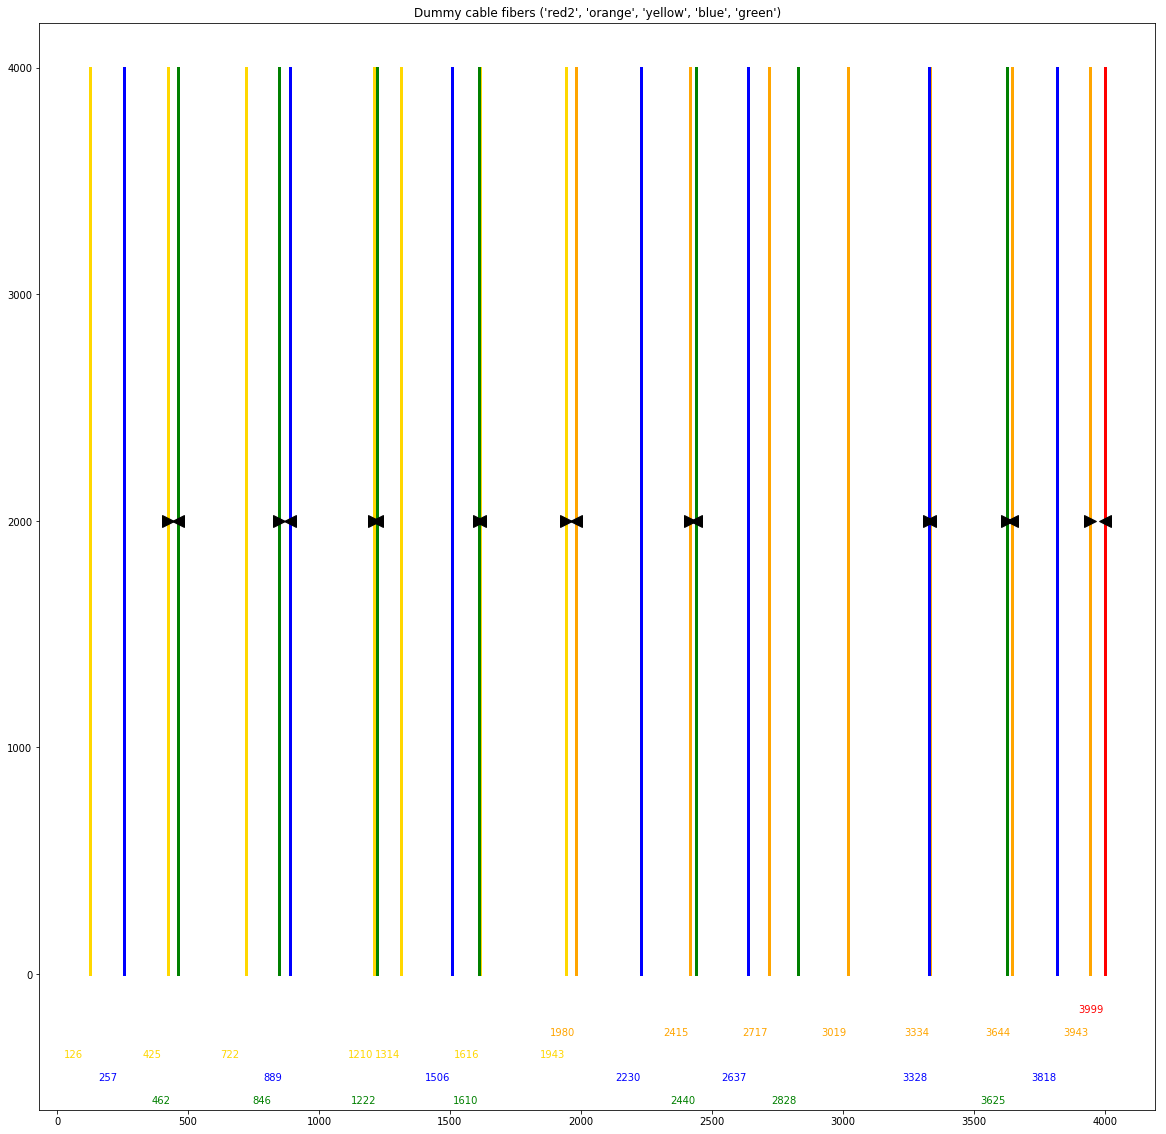

In [57]:
plot_combo(df_sorted, 0)

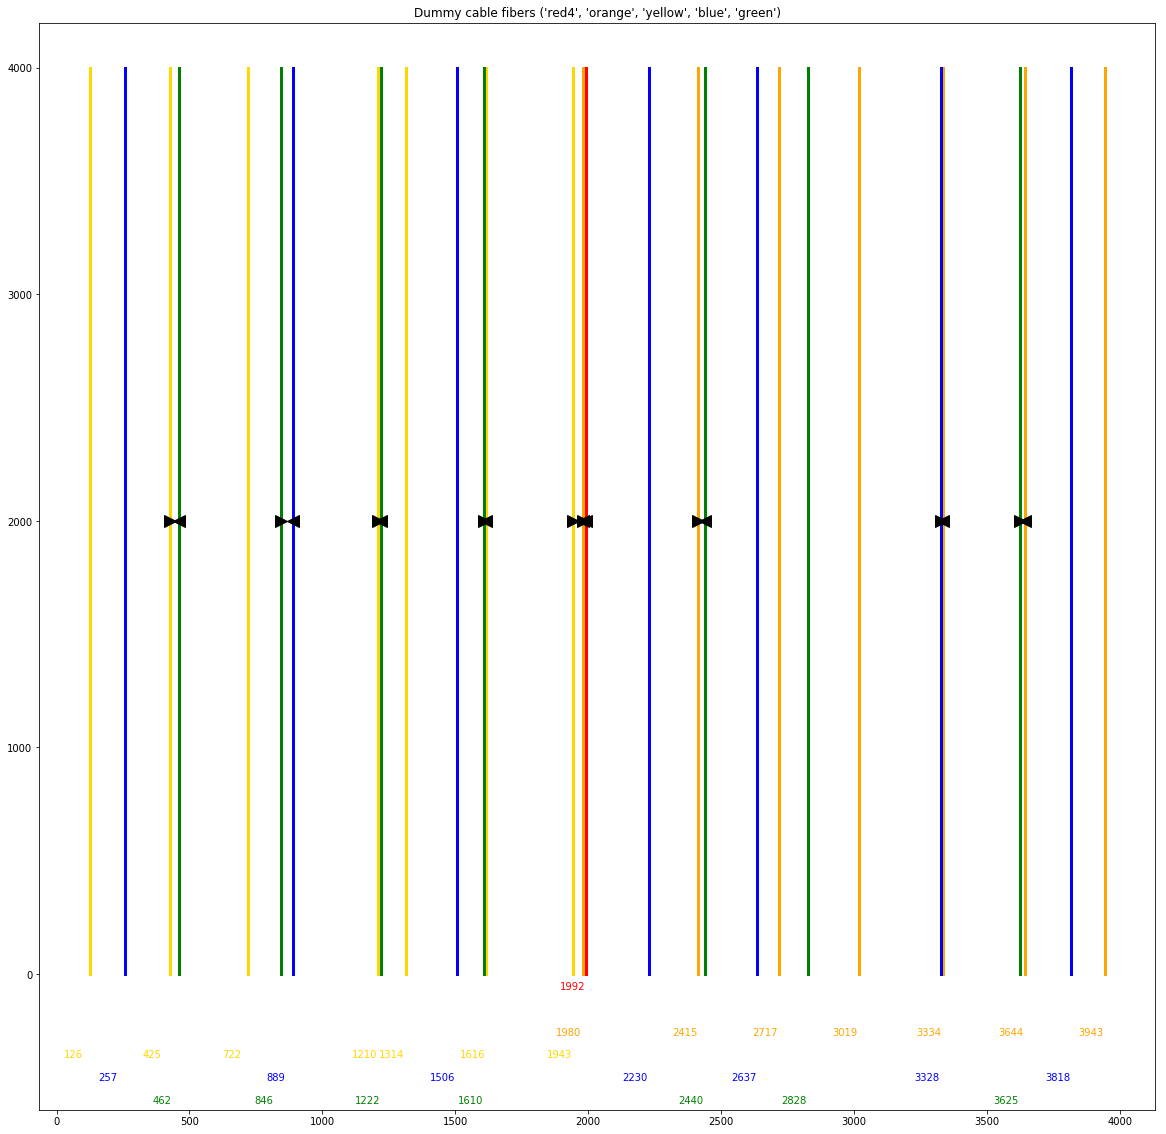

In [60]:
plot_combo(df_sorted, 1)

### Write to CSV

In [49]:
df_sorted.to_csv('bundles.csv')